# Analyzing Ford GoBike System Data
(Dataset Time: February 2019) 
By Eric Law Yuwei

# Introduction
Ford GoBike is the Bay Area's public bicycle sharing system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style(style="whitegrid")


In [91]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [92]:
#This is the raw data , printing the first 3 rows
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [5]:
# Show all columns information 
df.columns.tolist()

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [294]:
# Statistical description
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [295]:
# The size of the raw data 
df.shape

(183412, 16)

In [296]:
df.duplicated().sum()

0

In [297]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [298]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [299]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

# Cleaning
Before assessing the data to draw conclusions, there are some quality issues that need to be cleaned 

These are missing values throughout the dataset 
- start_station_id (197 missing values)
- start_station_name (197 missing values)
- end_station_id (197 missing values)
- end_station_name (197 missing values)
- member_birth_year (8265 missing values)
- member_gender (8265 missing values)

- Start/end times are not in the timestamp format (Done)
- The following columns are not in object format:
    - start_station_id
    - end_station_id
    - bike_id
- Member birth is in the float format, but should be    converted to integer format
- Member birthdates have a few inaccurate value

In [93]:
# Remove rows that does not have gender
df_cleaned=df[df['member_gender'].isnull() == False ]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [94]:
# Remove rows that does not have station id
df_cleaned = df_cleaned[df_cleaned['start_station_id'].isnull() == False]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [95]:
#create a copy 
df1_cleaned = df_cleaned.copy()

In [96]:
# Change start_time and end_time to datetime format
df1_cleaned.start_time = pd.to_datetime(df1_cleaned.start_time)
df1_cleaned.end_time = pd.to_datetime(df1_cleaned.end_time)

In [97]:
df1_cleaned['member_age'] = 2019 - df1_cleaned['member_birth_year']
df1_cleaned

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,23.0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,35.0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,29.0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,31.0


After i changed the start_time and end_time to Datetime format, we can easily extract and add the following:
- Month
- Week
- start_time_hour
- end_time_hour
- duration_min

column to figure out the trip duration in minutes 

In [98]:
# Extract dayofweek, hours information from the start_time
df1_cleaned['start_time_month'] = df1_cleaned['start_time'].dt.strftime('%B')
# Start time weekday
df1_cleaned['start_time_weekday'] = df1_cleaned['start_time'].dt.strftime('%a')
# Start and end time hour    
df1_cleaned['start_time_hour'] = df1_cleaned['start_time'].dt.hour
df1_cleaned['end_time_hour'] = df1_cleaned['end_time'].dt.hour
# Duration in seconds to duration in minutes
df1_cleaned['duration_min'] = df1_cleaned['duration_sec']/60
df1_cleaned['duration_min'] = df1_cleaned['duration_min'].astype(int)

In [99]:
# Change usertype & member gender to category
df1_cleaned.user_type = df1_cleaned.user_type.astype('category')
df1_cleaned.member_gender = df1_cleaned.member_gender.astype('category')


In [100]:
# Changing the bike_id, start_station_id, and end_station_id to object
df1_cleaned.bike_id = df1_cleaned.bike_id.astype(str)
df1_cleaned.start_station_id = df1_cleaned.start_station_id.astype(str)
df1_cleaned.end_station_id = df1_cleaned.end_station_id.astype(str)

In [101]:
#Ensure theres no null & Dtypes are in correct format. Looks pretty good !
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [102]:
del df1_cleaned['duration_sec']

In [103]:
df1_cleaned.sample(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_weekday,start_time_hour,end_time_hour,duration_min
59640,2019-02-20 19:51:25.600,2019-02-20 19:56:23.816,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,Subscriber,1970.0,Male,No,49.0,February,Wed,19,19,4
92287,2019-02-15 19:27:49.630,2019-02-15 19:32:41.637,60.0,8th St at Ringold St,37.774520,-122.409449,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,...,Customer,1989.0,Male,No,30.0,February,Fri,19,19,4
167668,2019-02-04 17:03:54.113,2019-02-04 17:07:48.706,343.0,Bryant St at 2nd St,37.783172,-122.393572,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,...,Subscriber,1987.0,Male,No,32.0,February,Mon,17,17,3
180606,2019-02-01 10:35:38.892,2019-02-01 10:41:49.505,64.0,5th St at Brannan St,37.776754,-122.399018,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,...,Subscriber,1990.0,Male,No,29.0,February,Fri,10,10,6
59169,2019-02-20 21:04:41.453,2019-02-20 21:06:34.288,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,243.0,Bancroft Way at College Ave,37.869360,-122.254337,...,Subscriber,1987.0,Male,No,32.0,February,Wed,21,21,1


[]

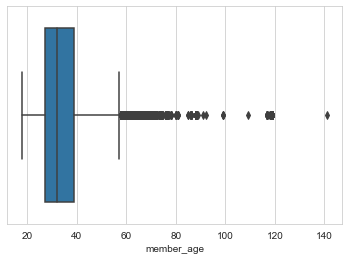

In [104]:
ax = sns.boxplot(x=df1_cleaned["member_age"])
plt.plot(figsize=(7, 2))

According to the boxplot , there are outliers that does not make sense. Since most of the users are age of 60 below, i will keep that proportion.

In [105]:
#filtering age > 60 
df1_cleaned=df1_cleaned[df1_cleaned['member_age'] <= 60]

In [106]:
#Check the Max age
df1_cleaned['member_age'].describe()

count    171422.000000
mean         33.523387
std           8.954923
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: member_age, dtype: float64

In [107]:
df1_cleaned.head(3)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_weekday,start_time_hour,end_time_hour,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,...,Customer,1984.0,Male,No,35.0,February,Thu,17,8,869
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,Customer,1972.0,Male,No,47.0,February,Thu,12,5,1030
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,...,Subscriber,1989.0,Other,No,30.0,February,Thu,17,4,608


In [108]:
#check if theres any duplicate
df_cleaned.duplicated().sum()

0

In [109]:
#calculating distance with longtitude and latitude 
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # R is the Earth radius (km) 

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return round(d,2)

In [110]:
# Im not sure how to solve the red error , but it seems the code is working
df1_cleaned['distance_km']=df1_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

<ipython-input-110-9291a497af83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['distance_km']=df1_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)


In [111]:
# Randomly check the dataset
df1_cleaned.sample(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km
23754,2019-02-25 19:29:34.532,2019-02-25 19:38:07.335,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,87.0,Folsom St at 13th St,37.769757,-122.415674,...,1992.0,Female,No,27.0,February,Mon,19,19,8,1.01
107304,2019-02-13 16:36:31.122,2019-02-13 16:41:02.837,79.0,7th St at Brannan St,37.773492,-122.403673,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,...,1977.0,Male,No,42.0,February,Wed,16,16,4,1.10
75041,2019-02-19 09:06:46.152,2019-02-19 09:34:54.758,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,1980.0,Male,No,39.0,February,Tue,9,9,28,1.52
96157,2019-02-15 11:15:14.646,2019-02-15 11:26:04.324,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,...,1993.0,Male,No,26.0,February,Fri,11,11,10,2.74
114395,2019-02-12 09:32:28.447,2019-02-12 09:44:35.643,61.0,Howard St at 8th St,37.776513,-122.411306,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,...,1986.0,Male,No,33.0,February,Tue,9,9,12,2.80


In [112]:
# Checking statistical summary for distance
df1_cleaned['distance_km'].describe()

count    171422.000000
mean          1.692345
std           1.095527
min           0.000000
25%           0.910000
50%           1.430000
75%           2.230000
max          69.470000
Name: distance_km, dtype: float64

In [113]:
# max distance 69.47km took  115mins
df1_cleaned[df1_cleaned['distance_km'] == 69.47]

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km
112038,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,-121.884995,...,1985.0,Female,No,34.0,February,Tue,14,16,115,69.47


In [276]:
# Save the cleaned data set to a new file
df1_cleaned.to_csv('fordgobike_cleaned_201902.csv', index = False)

# What is the structure of your dataset?
The initial raw dataset used on this notebook has approximate 183412 bike rides that documented in February 2019 in the San Francisco Bay Area. The dataset can be obtained from [here](https://www.lyft.com/bikes/bay-wheels/system-data).

The column header descriptions are as follows:

- Trip Duration
  - Start Time 
  - End Time 
- Start Station ID
  - Start Station Name
  - Start Station Latitude
  - Start Station Longitude
- End Station ID
  - End Station Name
  - End Station Latitude
  - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer)
  - Member Year of Birth
  - Member Gender

The dataset was further enhanced with additional features that i added: 
- Member Age
- Start Time Month
- Start Time Day Weekday
- Start Time Hour
- End Time Hour
- Duration(min)
- Distance (km)



## What is/are the main feature(s) of interest in your dataset?

The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including distance, their age, gender, and whether they are a paying member or a casual user. These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available.

## Univariate Exploration
This section investigate the  distributions of individual features. In search of relationship between variables 

# Ford GoBike Usage by 7-day Week

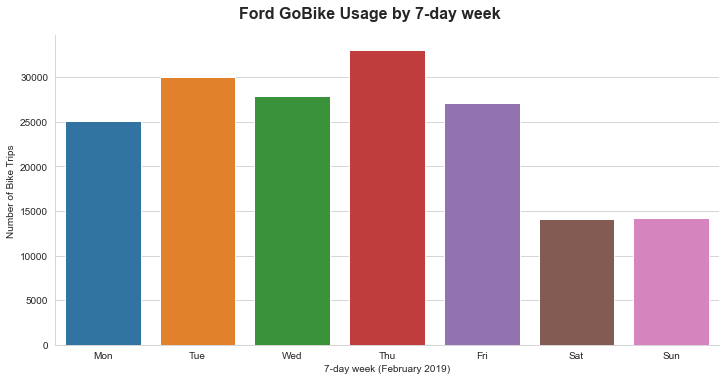

In [114]:
# Observation 1: Which day has the most people renting the bike?

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sns.catplot(data=df1_cleaned, x='start_time_weekday', kind='count', order = weekday, aspect = 2)

graph.set_axis_labels('7-day week (February 2019)', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by 7-day week', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=0,fontsize=10);

**Oberservation 1**:  Thursday seem to be the most popular days for using the bike sharing systems. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

# Ford GoBike Usage by Starting Hour

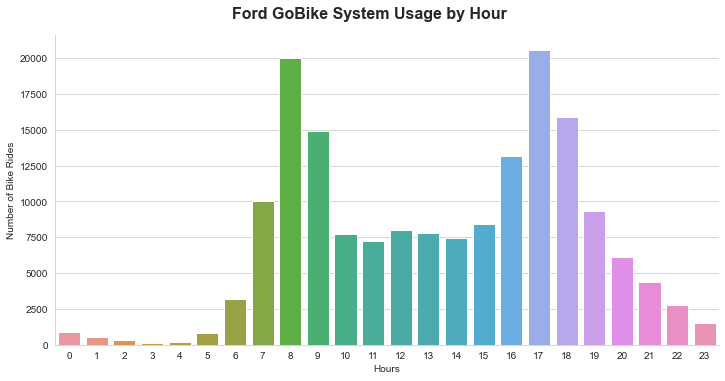

In [115]:
# Hourly usage of the Ford Go Bike System

graph = sns.catplot(data = df1_cleaned, x='start_time_hour', kind='count',aspect = 2);

graph.set_axis_labels('Hours', 'Number of Bike Rides');

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

**Oberservation 2:** Based on the diagram, the peak hour for bike rental are in the morning 8-9am and evening 5-6pm. This furthers the suggestion that the bikes are being used for primarily for commuters. 

# Ford GoBike Usage by Duration(min)

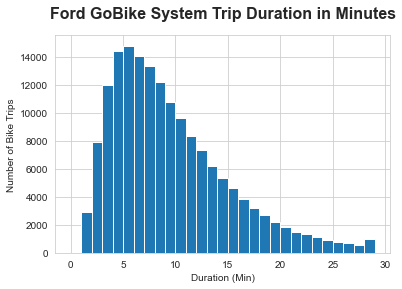

In [116]:
#Observation 3: Whats the duration (min) riders ride the bike ? 
bin_edges = np.arange(0,30,1)

plt.hist(data = df1_cleaned, x = 'duration_min', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

In [117]:
df1_cleaned['duration_min'].describe()

count    171422.000000
mean         11.228442
std          27.578606
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

**Oberservation 3**: The average Ford GoBike usage duration is approximate 11.2 minutes. Based on the histogram above, most rides fall between 4-8minutes range. This sugests riders are renting the bike for short distances. 

# Ford GoBike Distance Travelled (km)

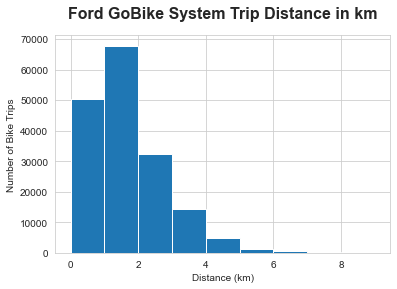

In [118]:
# How far does the riders travel? (In Kilometers)
bin_edges = np.arange(0, 10, 1)

plt.hist(data = df1_cleaned, x = 'distance_km', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in km", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Bike Trips');

In [119]:
df1_cleaned['distance_km'].describe()

count    171422.000000
mean          1.692345
std           1.095527
min           0.000000
25%           0.910000
50%           1.430000
75%           2.230000
max          69.470000
Name: distance_km, dtype: float64

**Oberservation 4**: The average distance (km) is 1.69km. Based on the histogram above, most distance traveled fall between 0.5km-2km. Both histogram (from observation 2 & 3) shows a right skewed distribution. Therefore both features are correlated. 

# Ford GoBike Average Riders Age

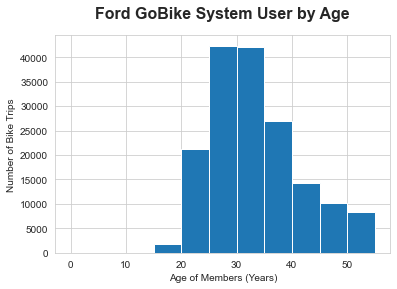

In [120]:
#Obersation 4 Whats the average riders age? 
bin_edges = np.arange(0, 60, 5)

plt.hist(data = df1_cleaned, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

In [121]:
df1_cleaned['member_age'].describe()

count    171422.000000
mean         33.523387
std           8.954923
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: member_age, dtype: float64

**Observation 5**: The mean age of a user is 33.5 years old. Above age 60 were removed previously due to minority and outliers. Based on the histogram, it shows majority of riders fall between the ages of 25 - 35, which is also the ideal age range of working adults.

# Ford GoBike System User By Gender

In [122]:
gender = df1_cleaned['member_gender'].value_counts()
gender

Male      127520
Female     40305
Other       3597
Name: member_gender, dtype: int64

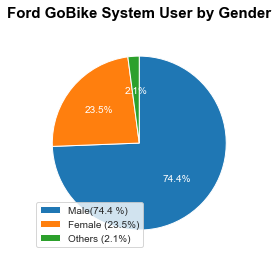

In [123]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
plt.title('Ford GoBike System User by Gender', y=1.05, fontsize=15, fontweight='bold', color = 'black');

labels = [r'Male(74.4 %)', r'Female (23.5%)', 
r'Others (2.1%)']
plt.legend(labels, loc="best");

**Observation 6**: The piechart above demonstrates the overwhelming majority of users of the bike share system are male, representing 74.4% of the total users

# Ford GoBike Usage User Type

In [124]:
user_type=df1_cleaned['user_type'].value_counts()
user_type

Subscriber    155050
Customer       16372
Name: user_type, dtype: int64

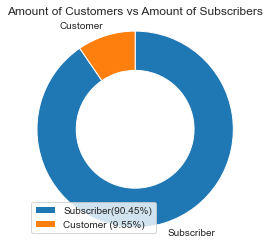

In [125]:
sorted_counts = df1_cleaned['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title("Amount of Customers vs Amount of Subscribers");
labels = [r'Subscriber(90.45%)', r'Customer (9.55%)']
plt.legend(labels, loc="best");

**Observation 7**: The piechart above demonstrates the overwhelming majority of user types of the bike share system are subscriber, representing 90.4% &  customer 9.55%

# Bivariate Exploration
In this section, relationships between pairs of variables in the data will be compared and observed

# Ford GoBike Usage by 7 days Week VS User Type

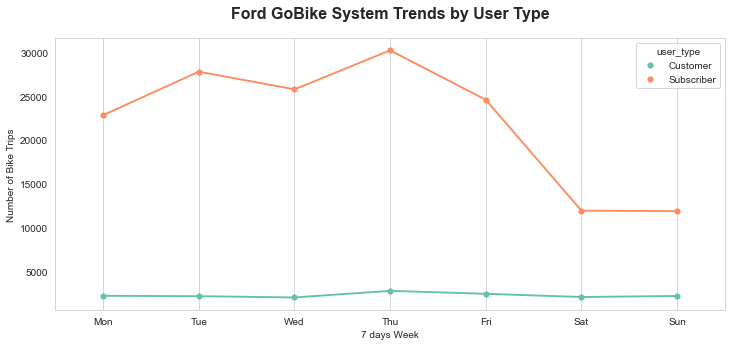

In [126]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df1_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday,palette="Set2",aspect = 2);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('7 days Week')
plt.ylabel('Number of Bike Trips');
plt.grid()

**Observation 1:** Customers have a relatively low usage of the bike share system with a small increase on the weekends.Howeverm, subscribers are dominant users where it maintains steadily high usage on weekdays, with a sharp decline on the weekends.

# Ford GoBike User Type Vs Average Distance(km)

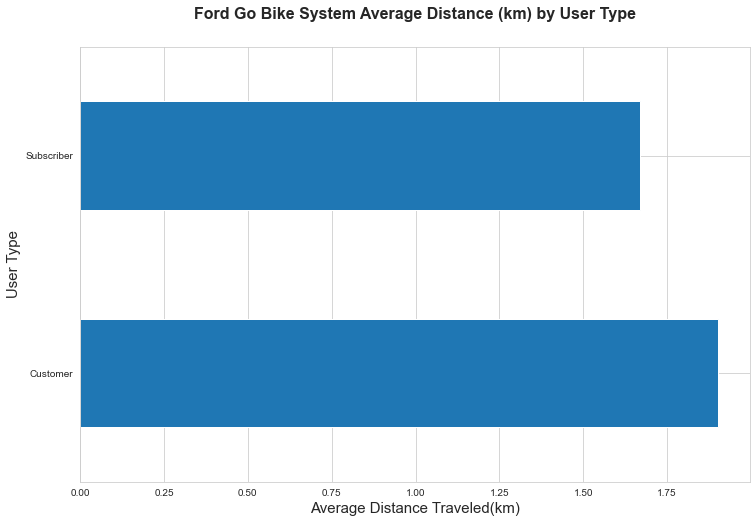

In [127]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df1_cleaned.groupby('user_type')['distance_km'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (km) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Distance Traveled(km)',fontsize=15)
plt.set_ylabel('User Type',fontsize=15);

**Observation 2:** The average distance traveled by customers is slightly higher than subscribers.

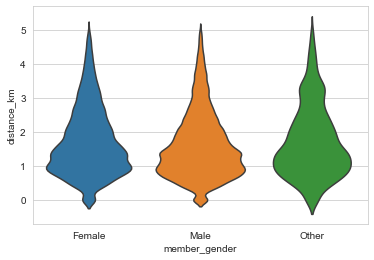

In [128]:
# Member gender VS Distance km
sns.violinplot(data = df1_cleaned.query("distance_km <= 5"),x = 'member_gender',y='distance_km',inner=None,fontsize=15);


# Ford GoBike Gender Vs Average Distance(km)

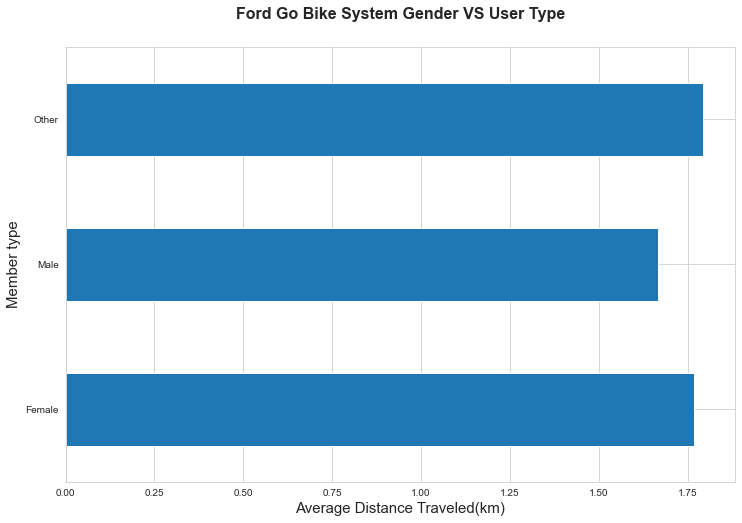

In [129]:
plt = df1_cleaned.groupby('member_gender')['distance_km'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Gender VS User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Distance Traveled(km)',fontsize=15)
plt.set_ylabel('Member type',fontsize=15);

In [130]:
df1_cleaned.groupby('member_gender')['distance_km'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40305.0,1.767884,1.149019,0.0,0.96,1.52,2.36,69.47
Male,127520.0,1.665613,1.073497,0.0,0.90,1.41,2.17,15.67
Other,3597.0,1.793611,1.204196,0.0,0.93,1.49,2.41,14.10


**Observation 3:** Based on the diagram, others have a higer concentration of people that travel long distance with average 1.79km. Second by Female with average 1.76km and lastly male with average 1.66km.

# Ford GoBike User Type Vs Age 

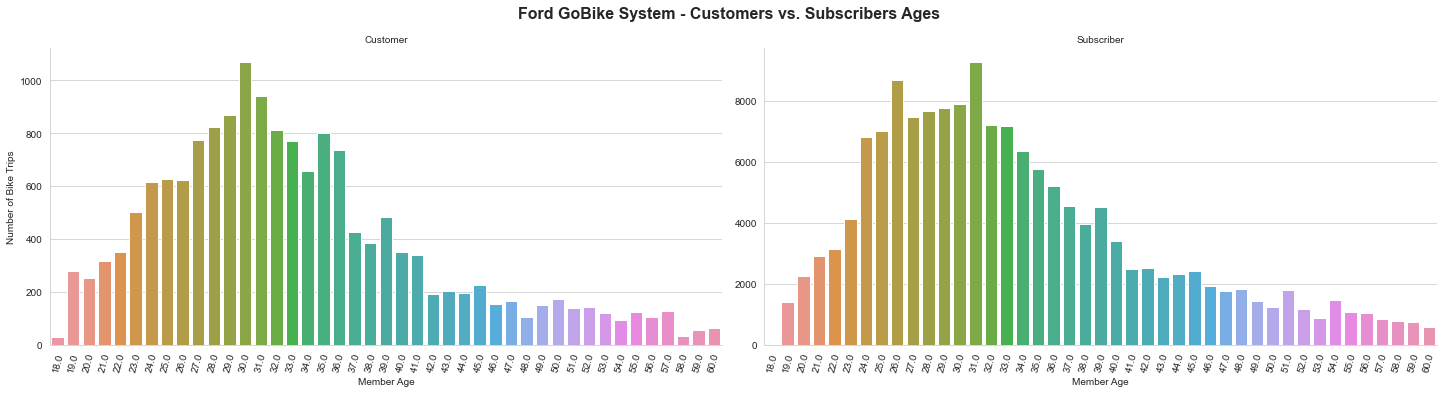

In [131]:
# User Type VS Age
graph = sns.catplot(data = df1_cleaned, x = 'member_age', col='user_type', kind='count', sharey = False, height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

**Observation 4:** Both user type graphs show the high number of 30-31 year olds falling withing both catgories. Subscribers have a wider range of ages while Customers tends to have mostly younger users (most are under the 31 threshold) while the Subscriber user group is more spread out between varying ages with plenty of users in their mid-fifities

**Note** (the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier)

# Ford GoBike User type Vs Gender

In [146]:
from matplotlib import figure


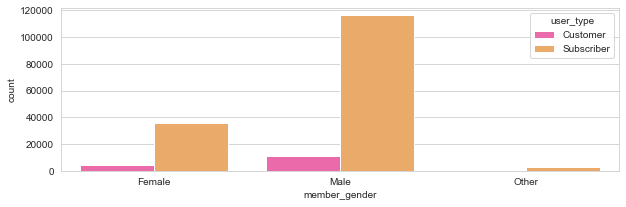

In [150]:
plt.figure(figsize = [10,3]);
sns.countplot(data = df1_cleaned, x = 'member_gender', hue = 'user_type', palette = 'spring');

**Observation 5:** Looks like most of the subscribers are male. 

# Ford GoBike Starting Hour VS Gender & Starting Hour VS User Type

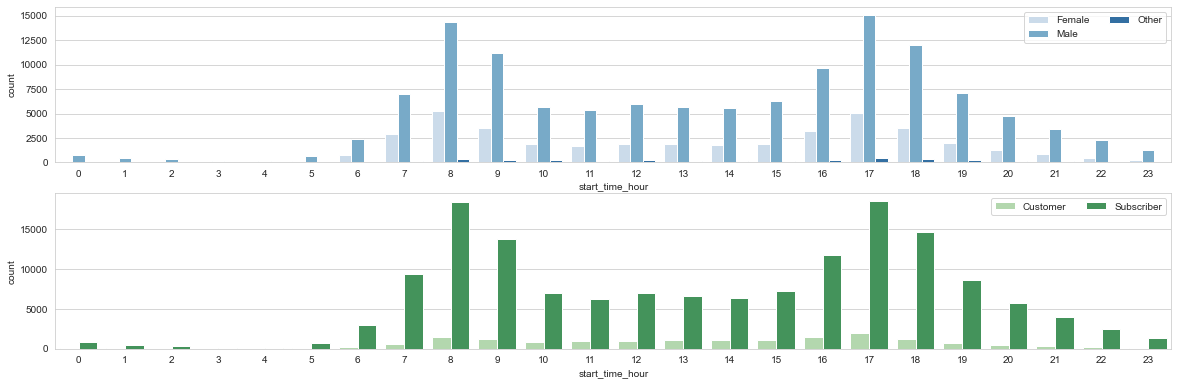

In [152]:
plt.figure(figsize = [20, 20]);
ax = plt.subplot(6, 1, 1);
sns.countplot(data = df1_cleaned, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping


ax = plt.subplot(6, 1, 2);
sns.countplot(data = df1_cleaned, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping




# Multivariate Exploration
 three or more variables will be investigated 

# **Members gender VS User Type VS Distance mean in KM**

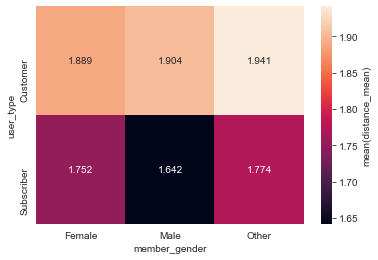

In [157]:
#2D heatmap: Member gender VS User Type VS Distance KM
heat_means = df1_cleaned.groupby(['member_gender', 'user_type']).mean()['distance_km']
heat_means = heat_means.reset_index(name = 'distance_mean')
heat_means = heat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'distance_mean')
sns.heatmap(heat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(distance_mean)'});



**Observation 1:** Both other_customer & other_subscriber have the highest distance mean.

# **User Type VS Members type VS Duration in min**

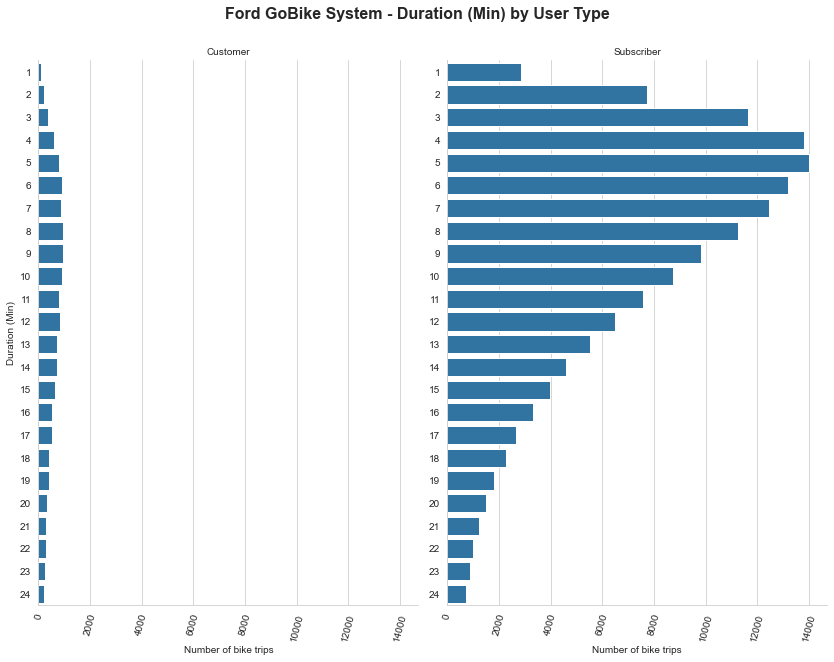

In [470]:
# Customer Usage by Duration vs. Subscriber Usage by Duration


data = df1_cleaned.query('duration_min < 25')

graph = sns.catplot(data=data, y = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height = 8.27,  aspect = (11.69/2)/8.27);

graph.set_axis_labels('Number of bike trips', 'Duration (Min)')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

**Observation 3:** The graph shows the ride duration spread in minutes. This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area

**Note** the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier)

# Heatmap for Member age Vs customer type vs Duration (min)

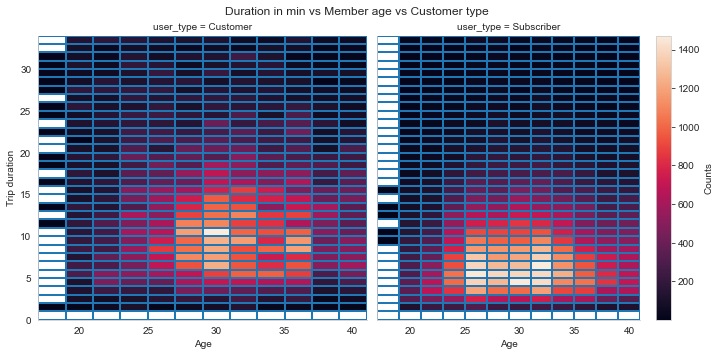

In [169]:
df2=df1_cleaned[df1_cleaned['member_age'] <=40]
xbin = np.arange(17, df2['member_age'].max()+3,2 )
ybin = np.arange(0, 35, 1)

g = sns.FacetGrid(data = df2, col = 'user_type',height=5)
g.map(plt.hist2d, 'member_age','duration_min',cmin=0.5,bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');

## code copie from
## https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Duration in min vs Member age vs Customer type");

g.set_ylabels("Trip duration");
g.set_xlabels("Age");

In [33]:
df1_cleaned['member_age'].describe()

count    171422.000000
mean         33.523387
std           8.954923
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: member_age, dtype: float64

In [38]:
df1_cleaned['duration_min'].describe()

count    171422.000000
mean         11.228442
std          27.578606
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

In [170]:
df1_cleaned.to_csv('fordgobike_cleaned_201902_v2.csv', index = False)

# Were there any interesting or surprising interactions between features

There is a difference in distance travelled between customers and subscribers. Customers trips are slightly longer and further than for subscribers, most probably due to the fact they prefer bike rides around weekends, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

# Summary

- The peak hour for bike rental are in the morning 8-9am and evening 5-6pm. This furthers the suggestion that the bikes are being used for primarily for commuters.
- Thursday is the most popular days for using the bike sharing systems. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.
- The piechart above demonstrates the overwhelming majority of user types of the bike share system are subscriber, representing 90.4% &  customer 9.55%
- Most of the subscribers are male 
- Most of the subscribers age between 25-35, however customers age between 30-35
- Majority of subscribers usage duration between 3-8 minutes , mainly for commuting 
- There is no correlation between travel distance , age and gender








Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city for short distance, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

Age is also a factor within user type. Subscribers who fall in the age group between 25-35 years old are the most common age group to use the bike sharing system.